# edX Web Scraping Project 



### Patrick Masi-Phelps
### NYCDSA Cohort 10


#### This document shows the data management and visualization process for data scraped from edX. Please note that the .pkl file included in this repository has already been altered per the below code.

### 0. Import Packages

In [1]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#   load the dataframe -- this contains variables created and manipulated in the below data management sections
courses_new_working = pd.read_pickle('courses_new_working.pkl')

### 1. Data Management

In [438]:
#   check out the dataframe
courses_new_working

,title,short_description,institution,subject,price,length,effort,level,prerequisites,course_link,total_hours,total_hours_max,expected_hours,division,inst_type,log_exp_hrs
0,Introduction to Web Accessibility,Learn the best practices and guidelines needed...,Microsoft,Computer Science,0.0,5 weeks,3-4 hours per week,Intermediate,NaN,https://www.edx.org/course/introduction-web-ac...,15.0,20.0,17.5,Math/Sciences,Private Company,2.862201
1,Personnel Management for Public Libraries,Learn the foundational principles of personnel...,MichiganX,Art & Culture,0.0,4 weeks,2-4 hours per week,Introductory,Access to a public library community.,https://www.edx.org/course/personnel-managemen...,8.0,16.0,12.0,Humanities,Public/Non-Profit University,2.484907
2,Introduction to Data Analysis using Excel,"Learn the basics of Excel, one of the most pop...",Microsoft,Data Analysis & Statistics,0.0,4 weeks,2-4 hours per week,Introductory,Missing,https://www.edx.org/course/introduction-data-a...,8.0,16.0,12.0,Math/Sciences,Private Company,2.484907
3,Build Web APIs using ASP.NET,Learn the skills needed to create RESTful serv...,Microsoft,Computer Science,0.0,4 weeks,3-4 hours per week,Intermediate,Knowledge of C# Knowledge of web technologies ...,https://www.edx.org/course/build-web-apis-usin...,12.0,16.0,14.0,Math/Sciences,Private Company,2.639057
4,Islamic Finance and Banking: Modes of Finance,Learn about the different modes of Islamic Fin...,IRTIx,Economics & Finance,0.0,4 weeks,3-4 hours per week,Introductory,None,https://www.edx.org/course/islamic-finance-ban...,12.0,16.0,14.0,Social Sciences,Private Company,2.639057
5,Knowledge Management and Big Data in Business,Learn about the integrative power of knowledge...,HKPolyUx,Business & Management,0.0,6 weeks,6-8 hours per week,Introductory,None,https://www.edx.org/course/knowledge-managemen...,36.0,48.0,42.0,Social Sciences,Public/Non-Profit University,3.737670
6,Introduction to Java Programming Part 1,Learn the fundamental elements of Java program...,HKUSTx,Computer Science,0.0,5 weeks,3-5 hours per week,Introductory,None,https://www.edx.org/course/introduction-java-p...,15.0,25.0,20.0,Math/Sciences,Public/Non-Profit University,2.995732
7,Introduction to Java Programming Part 2,The first MOOC to teach the fundamental elemen...,HKUSTx,Computer Science,0.0,5 weeks,3-5 hours per week,Introductory,Introduction to Java Programming Part 1 - COMP...,https://www.edx.org/course/introduction-java-p...,15.0,25.0,20.0,Math/Sciences,Public/Non-Profit University,2.995732
8,Introduction to Mobile Application Development...,Learn the basics of mobile application develop...,HKUSTx,Computer Science,0.0,6 weeks,3-5 hours per week,Introductory,Basics of Java programming OR COMP102x OR COMP...,https://www.edx.org/course/introduction-mobile...,18.0,30.0,24.0,Math/Sciences,Public/Non-Profit University,3.178054
9,Portfolio Management & Governance,Learn how a Project Management Office (PMO) wo...,UWashingtonX,Business & Management,0.0,4 weeks,2-5 hours per week,Introductory,None.,https://www.edx.org/course/portfolio-managemen...,8.0,20.0,14.0,Social Sciences,Public/Non-Profit University,2.639057


In [271]:
###   the effort and length values were not standardized, this cleans everything so that effort is a string of 
###   "X hours per week" or "X hours" if the course didn't specify hours per week

courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='/', value=' per ', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='hrs', value='hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='About ', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' - ', value='-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=', depending on background.', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' to ', value='-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' \(depending on background\)', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' of material covered', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' \\x89ÛÒ ', value='-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=', self-paced', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='45 minutes', value='.75', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='\\x89ÛÒ6', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='heures', value='hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Most users will find that thoroughly covering the material will take anywhere from ', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='; 75 hours', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='-complete entire course', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Total Effort: ', value='', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Part 1: 3 hours; Part 2: 4 hours; Part 3: 2 hours', value='9 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='12 hours per week \(7 weeks\)', value = '12 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Week', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' total', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='4 per 5 hours per week', value = '4-5 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='9 problem sets \(10-20 hours each\), 1 final project', value = '90-210 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='1 hour per module; 7 modules', value = '7 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='- ', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' -', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='semaine', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' are anticipated. Additional hours may be required for learners seeking additional practice', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='; midterm exam; final exam', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='From 10-60 minutes, or as much time as you want\.', value = '.16-1 hour', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='5 hours of per week', value = '5 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Hours', value = 'hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='per  week', value = 'per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' for the entire course', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' depending on the background of the student\.', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='; 2-3 hours for lectures; 3-5 hours for homework per self-study', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='~', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='module of material', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='module', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' â€“ ', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='â€“', value = '-', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace=' \| å°\\x8fæ—¶ï¼\\x8få‘¨', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Student progress through the course is self-paced', value = 'self-paced', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='Estimated effort: ', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='3-4 hours per unit \(recommended pace: 1 unit per week\)', value = '3-4 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='5 sections, 1-2 hours per section', value = '5-10 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='4-6 hours per unit or week', value = '4-6 hours per week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='-complete exam', value = '', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='unit', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='48 hours, Self-paced', value = '48 hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='section', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='10 weeks', value = 'self-paced', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='week.', value = 'week', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='hours.', value = 'hours', regex = True)
courses_new_working['effort'] = courses_new_working['effort'].replace(to_replace='hoursper', value = 'hours per', regex = True)

courses_new_working['length'] = courses_new_working['length'].replace(to_replace='4 weeks, self-paced', value = '4 weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace=' of content to be completed at student\'s own pace during 13 week window \(Sept 15 - Dec 15, 2016\)', value = '', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='Each student\'s path to mastery is individual', value = 'self-paced', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='; we expect you to complete the course in 30-40 hours', value = '', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace=' \(8 units\)', value = '', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='see FAQ', value = 'Missing', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='100 days', value = '14 weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace=2, value = '2 weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='sections', value = 'weeks', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='nan', value = 'Missing', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='Week', value = 'week', regex = True)
courses_new_working['length'] = courses_new_working['length'].replace(to_replace='Self', value = 'self', regex = True)

###   change FREE to 0 in price column
courses_new_working['price'].replace('FREE', 0, inplace=True)

In [439]:
###   save the df as a pkl doc
courses_new_working.to_pickle('courses_new_working.pkl')

In [242]:
###   in case there are return value characters in cells - replace them with blanks
courses['prerequisites'] = courses['prerequisites'].replace(to_replace='\r', value = ' ', regex = True)
courses['short_description'] = courses['short_description'].replace(to_replace='\r', value = ' ', regex = True)

In [262]:
###   in case you need to import the excel backup
courses_new = pd.read_excel('courses_new_master.xlsx', header=0)

In [49]:
###   create total course hours min column. if the effort column is measured in hrs/week, 
###   we multiply length (in weeks) by lower bound of effort (hrs/week). 
###   If effort is total hours, then we just take that number.
###   this uses regex to pull the appropriate values based on various conditionals


courses_new_working['total_hours'] = np.where(courses_new_working['effort'].str.contains('week'), courses_new_working['length'].str.extract('^(\d+)').astype(float)*courses_new_working['effort'].str.extract('^(\d+)').astype(float), courses_new_working['effort'].str.extract('^(\d+)').astype(float))


/Users/Patrick/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [57]:
###   create total hours max column. if the effort column is measured in hrs/week, 
###   we multiply length (in weeks) by upper bound of effort (hrs/week). 
###   If effort is total hours, then we just take that number.


courses_new_working['total_hours_max'] = np.where(courses_new_working['effort'].str.contains('week'), courses_new_working['length'].str.extract('^(\d+)').astype(float)*courses_new_working['effort'].str.extract('^\d+-(\d+)').astype(float), courses_new_working['effort'].str.extract('^(\d+)').astype(float))


/Users/Patrick/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [62]:
###   get expected total hours (average of min/max total hours if available. else, take the total expected hours given)

courses_new_working['expected_hours'] = np.where((courses_new_working['total_hours'] > 0) & (courses_new_working['total_hours_max'] > 0), ((courses_new_working['total_hours']) + (courses_new_working['total_hours_max']))/2.0, courses_new_working['total_hours'])


In [ ]:
###   create new df grouping by division and subject, then counting the total number of courses offered in each subject.

subject_counts = pd.DataFrame(courses_new_working.groupby(['division','subject']).size().rename('counts')).reset_index()

###   sort the df by counts

subject_counts = subject_counts.sort_values(['division', 'counts'], ascending = [True, False,])

### 2. Data Visualization

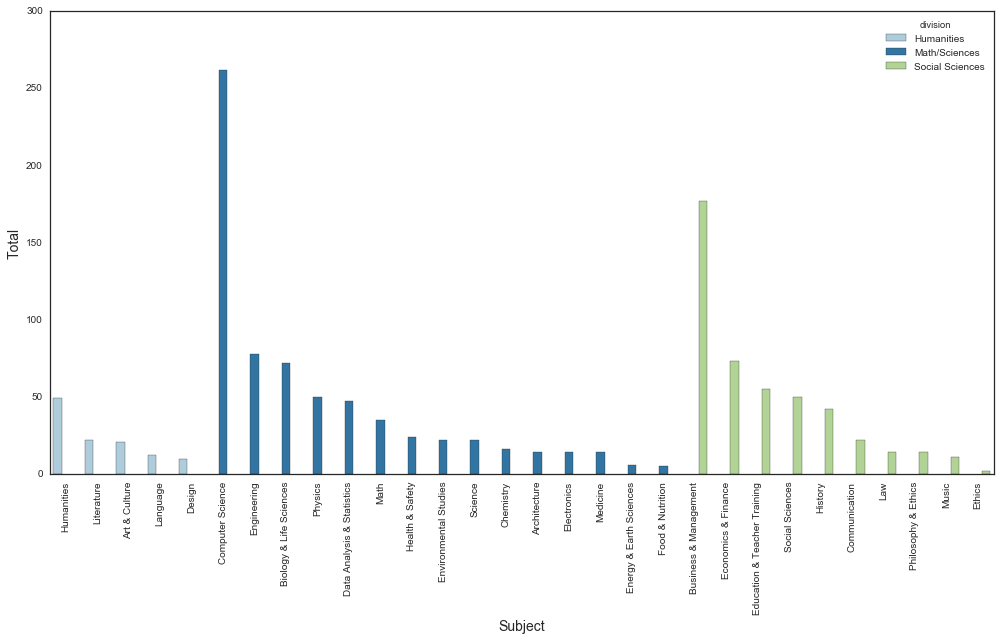

In [445]:
###   bar graph of the number of courses offered in each subject - grouped by division
###   this gives us a lay of the land

a4_dims = (14, 9)
fig, ax = plt.subplots(figsize=a4_dims)

g1 = sns.barplot(data = subject_counts.sort_values(['division', 'counts'], ascending = [True, False,]),
            ax = ax,
            x = 'subject', 
            y = 'counts', 
            hue = "division",
            palette="Paired")

ax.set_ylabel('Total', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

plt.xticks(rotation=90)

plt.tight_layout()
g1.figure.savefig("courses_by_subject.png")
plt.show()

In [78]:
###   group the subjects into 3 divisions

def f(row):
    if row['subject'] in ['Computer Science', 'Data Analysis & Statistics',
       'Health & Safety', 'Math', 'Engineering', 'Physics', 'Biology & Life Sciences',
       'Science', 'Medicine', 'Chemistry', 'Environmental Studies',
       'Energy & Earth Sciences', 'Food & Nutrition', 'Architecture', 'Electronics']:
        val = 'Math/Sciences'
    elif row['subject'] in ['Economics & Finance', 'Business & Management', 
                              'Social Sciences', 'Communication', 'Law', 
                              'History', 'Ethics', 'Philosophy & Ethics',
                              'Education & Teacher Training', 'Music']:
        val = 'Social Sciences'
    else:
        val = 'Humanities'
    return val

courses_new_working['division'] = courses_new_working.apply(f, axis=1)

In [276]:
###   group the institutions into 3 divisions: public or non-profit university, private company, other non-profit company/org
###   this sets up the lists

pub_or_non_profit_u = ['MichiganX','HKPolyUx','HKUSTx','UWashingtonX','UQx', 'RITx','DelftX', 'UTAustinX', 'KyotoUx',
               'OsakaUx', 'BabsonX', 'WellesleyX', 'Wharton', 'BerkleeX',
               'HarvardX', 'RiceX','ANUx','EPFLx','UC BerkeleyX', 'PennX','UBCx','MITx',
               'UC San DiegoX','WitsX','USMx','Weston High School',
               'UTSanAntonioX','IIMBx','TUMx','CurtinX','ETHx','WageningenX','LouvainX', 'UTHealthSPHx',
               'ChalmersX','ColumbiaX','UC3Mx','KULeuvenX','GeorgetownX','TeachersCollegeX','TsinghuaX', 'ASUx',
               'DartmouthX', 'UPValenciaX','AdelaideX','UAMx','MEPhIx','ImperialX', 'IITBombayX',
               'CornellX', 'GTx', 'BUx', 'EdinburghX','UTMBx','UTPermianBasinX','Davidson Next',
               'University of TorontoX', 'UTokyoX','RWTHx','GalileoX','TrinityX','UTArlingtonX','IDBx','PurdueX',
               'kironX','NewcastleX','ThunderbirdX','HKUx','CaltechX','KTHx','MISISx','TokyoTechX','NotreDameX',
               'KIx','DavidsonX','UTennesseeX', 'Cooper Union', 'HarveyMuddX','PrincetonX',
               'BrownX','IMTx','VictoriaX','PerkinsX','ITMOx','OxfordX', 'SmithX', 'SNUx', 'HamiltonX','UrFUx',
               'PekingX', 'ColgateX','St. Margarets Episcopal School', 'WasedaX','UChicagoX','McGillX']
private = ['New York Institute of Finance','SchoolYourself','Microsoft','IRTIx','TenarisUniversity','Red Hat','MongoDBx']
non_profit_org = ['ETSx','LinuxFoundationX','IEEEx','W3Cx','CatalystX','MandarinX','SmithsonianX',
                 'Amnesty InternationalX','FullbridgeX','edX','ACCA','WBGx','Tennessee Board of Regents','Bibliotheca Alexandrina',
                 'IMFx','Save A LifeX','OECx']

In [277]:
###   this function adds a new column to the dataset indicating the institution type, based on lists above

def g(row):
    if row['institution'] in pub_or_non_profit_u:
        val = 'Public/Non-Profit University'
    elif row['institution'] in private:
        val = 'Private Company'
    else:
        val = 'Non-Profit Company or Other Organization'
    return val

courses_new_working['inst_type'] = courses_new_working.apply(g, axis=1)

In [357]:
###   creates a new column, log transformation of expected hours - for the ANOVA test later on

courses_new_working['log_exp_hrs'] = np.log(courses_new_working['expected_hours'])

In [433]:
###   gets the count, mean, var of expected hours by institution type

courses_new_working.groupby('inst_type',).agg({'expected_hours':['count','mean','var']})

expected_hours             \
                                                  count       mean   
inst_type                                                            
Non-Profit Company or Other Organization             70  33.571429   
Private Company                                     126  15.928571   
Public/Non-Profit University                        997  40.399699   

                                                       
                                                  var  
inst_type                                              
Non-Profit Company or Other Organization  5132.770186  
Private Company                            128.842857  
Public/Non-Profit University              1176.684709

In [432]:
###   gets the count, mean, var of log(expected hours) by institution type

courses_new_working.groupby('inst_type',).agg({'log_exp_hrs':['count','mean','var']})

log_exp_hrs                    
                                               count      mean       var
inst_type                                                               
Non-Profit Company or Other Organization          70  2.828452  1.108878
Private Company                                  126  2.534504  0.535939
Public/Non-Profit University                     997  3.376644  0.695310

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



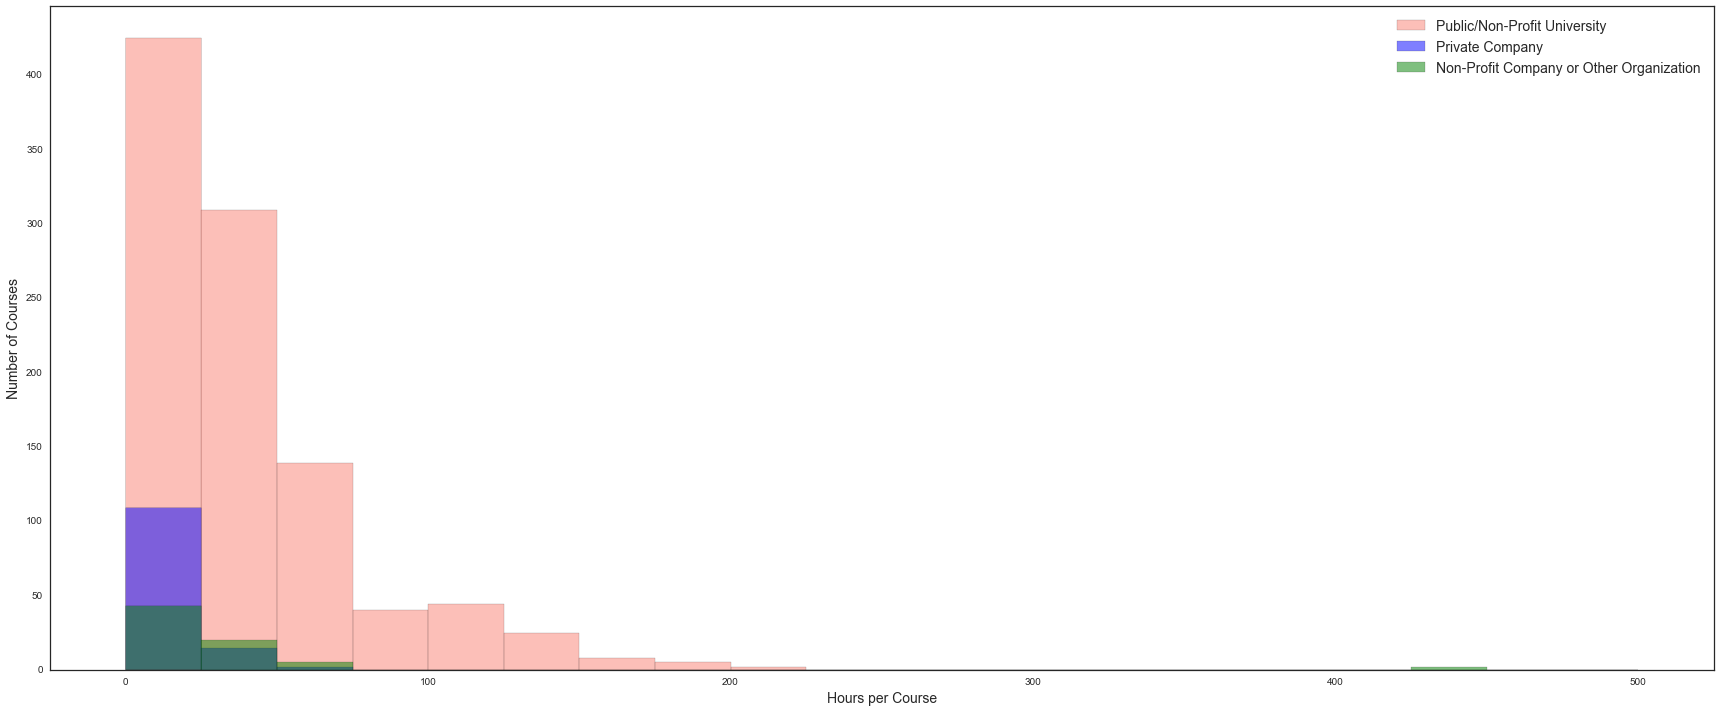

In [441]:
###   plot a histogram of expected hours for each course for the three institution types overlaid
###   salmon = 'Public/Non-Profit University'
###   purple/blue = 'Private Company'
###   green = 'Non-Profit Company or Other Organization'
###   note these distributions are skewed right

private = courses_new_working[courses_new_working['inst_type'] == 'Private Company']["expected_hours"].reset_index(drop=True)
publicu = courses_new_working[courses_new_working['inst_type'] == 'Public/Non-Profit University']["expected_hours"].reset_index(drop=True)
nonprofit = courses_new_working[courses_new_working['inst_type'] == 'Non-Profit Company or Other Organization']["expected_hours"].reset_index(drop=True)


fig, ax = plt.subplots()

ax.hist(publicu, range = (0.0, 500.0), bins = 20, color='salmon', alpha=0.5, label = 'Public/Non-Profit University')
ax.hist(private, range = (0.0, 500.0), bins = 20, color='blue', alpha=0.5, label ='Private Company')
ax.hist(nonprofit, range = (0.0, 500.0), bins = 20, color='green', alpha=0.5, label = 'Non-Profit Company or Other Organization')

ax.set_xlabel('Hours per Course', fontsize = 14)
ax.set_ylabel('Number of Courses', fontsize = 14)

ax.margins(0.05)
ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14)

plt.tight_layout()

plt.savefig("inst_type_hours_dist.png")

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning:

invalid value encountered in greater_equal

/Users/Patrick/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning:

invalid value encountered in less_equal



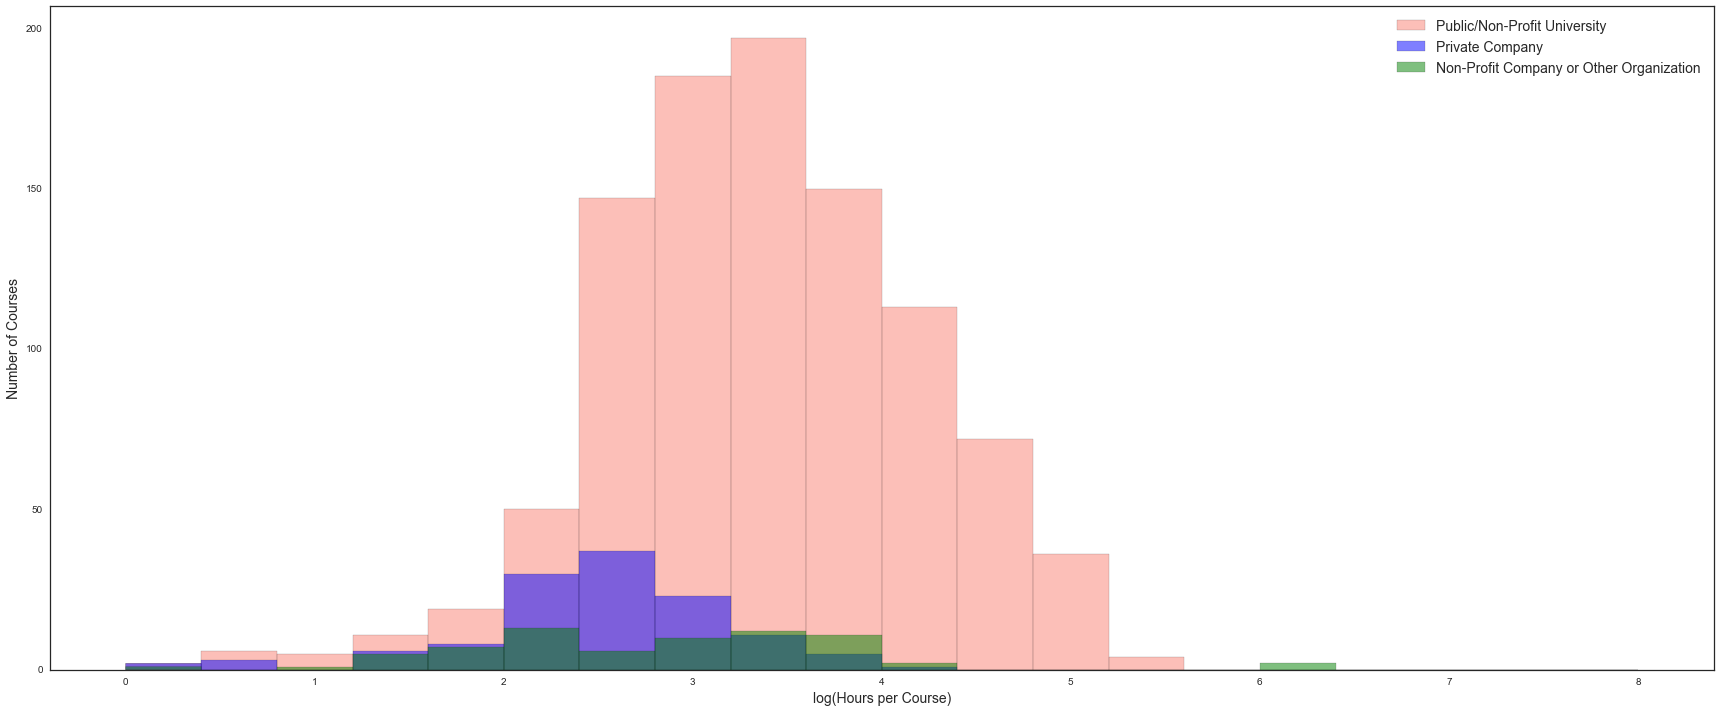

In [431]:
###   plot a histogram of log(expected hours) for each course for the three institution types overlaid
###   salmon = 'Public/Non-Profit University'
###   purple/blue = 'Private Company'
###   green = 'Non-Profit Company or Other Organization'
###   these histograms are closer to normal distributions - better for ANOVA test which has a standard error normality assumption

private = courses_new_working[courses_new_working['inst_type'] == 'Private Company']["log_exp_hrs"].reset_index(drop=True)
publicu = courses_new_working[courses_new_working['inst_type'] == 'Public/Non-Profit University']["log_exp_hrs"].reset_index(drop=True)
nonprofit = courses_new_working[courses_new_working['inst_type'] == 'Non-Profit Company or Other Organization']["log_exp_hrs"].reset_index(drop=True)


fig, ax = plt.subplots()

ax.hist(publicu, range = (0.0, 8.0), bins = 20, color='salmon', alpha=0.5, label = 'Public/Non-Profit University')
ax.hist(private, range = (0.0, 8.0), bins = 20, color='blue', alpha=0.5, label ='Private Company')
ax.hist(nonprofit, range = (0.0, 8.0), bins = 20, color='green', alpha=0.5, label = 'Non-Profit Company or Other Organization')

ax.set_xlabel('log(Hours per Course)', fontsize = 14)
ax.set_ylabel('Number of Courses', fontsize = 14)

ax.margins(0.05)
ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize = 14)

plt.tight_layout()

plt.savefig("inst_type_log_hours.png")

In [442]:
###   One-way ANOVA test of the three institution types by log(expected hours) for each course

courses_ftest = courses_new_working[np.isfinite(courses_new_working['log_exp_hrs'])]

stats.f_oneway(courses_ftest[courses_ftest['inst_type'] == 'Non-Profit Company or Other Organization']["log_exp_hrs"],
               courses_ftest[courses_ftest['inst_type'] == 'Private Company']["log_exp_hrs"],
               courses_ftest[courses_ftest['inst_type'] == 'Public/Non-Profit University']["log_exp_hrs"])


###   Note the p-value is low enough to reject the null hypothesis at the .01 significance level

F_onewayResult(statistic=66.114260711845702, pvalue=5.930100458064523e-28)

In [302]:
###   group the data by subject and institution type. 
###   this will let us look at each subject and what types of institutions offer those courses 

subject_inst_type_counts = pd.DataFrame(courses_new_working.groupby(['subject','inst_type']).size().rename('counts')).reset_index()


In [303]:
###   pivot the dataframe so that we can have one row per subject, with new columns for number of courses offered by each type of institution

subject_inst_type_counts = subject_inst_type_counts.pivot(index='subject', columns='inst_type', values='counts').reset_index()

In [305]:
###   add a total courses offered column (sum of 3 categories)

subject_inst_type_counts['total'] = subject_inst_type_counts.sum(axis=1)


In [315]:
###   sort the dataframe, fill in NaNs with zeros, 

subject_inst_type_counts = subject_inst_type_counts.sort_values(['total'], ascending = False)
subject_inst_type_counts = subject_inst_type_counts.fillna(value = 0)

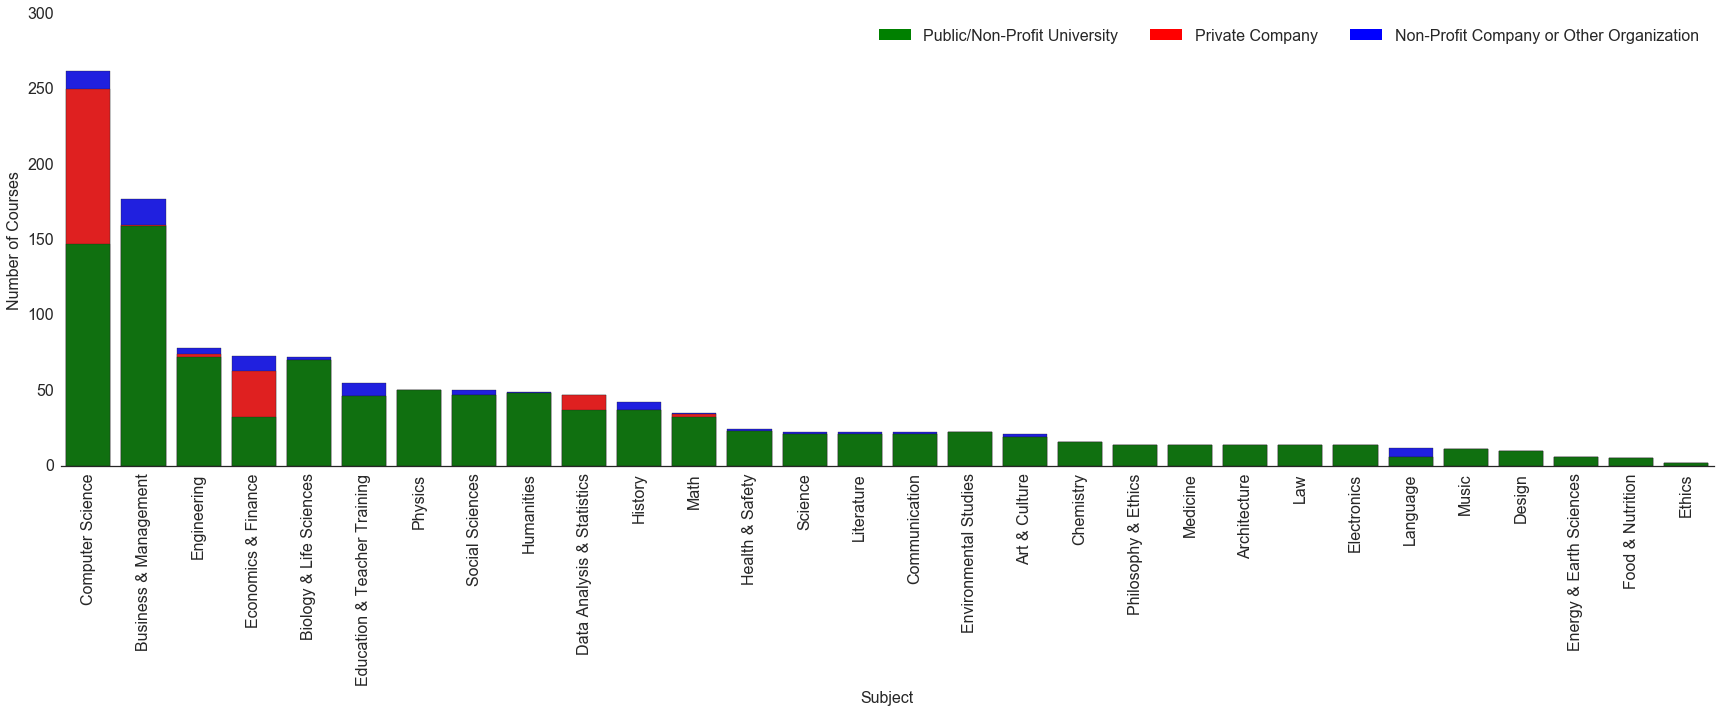

In [443]:
###   bar plot of the number of courses offered in each subject, colored by institution type

%matplotlib inline

###   Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

###   Plot 1 - Non-Profit Company/Other Org Bar
sns.barplot(x = subject_inst_type_counts['subject'], 
            y = subject_inst_type_counts['total'], 
            color = "blue")

###   Plot 2 - overlay - Private Company
bottom_plot = sns.barplot(x = subject_inst_type_counts['subject'], 
                          y = subject_inst_type_counts['Private Company']+subject_inst_type_counts['Public/Non-Profit University'], 
                          color = "red")

###   Plot 3 - overlay - Public/Non-Profit University
bottom_plot = sns.barplot(x = subject_inst_type_counts['subject'], 
                          y = subject_inst_type_counts['Public/Non-Profit University'], 
                          color = "green")


topbar = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
midbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')

l = plt.legend([bottombar, midbar, topbar], ['Public/Non-Profit University', 
                                             'Private Company', 
                                             'Non-Profit Company or Other Organization'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("Number of Courses")
bottom_plot.set_xlabel("Subject")

###   this gets the legend 
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

plt.xticks(rotation=90)

plt.tight_layout()

plt.savefig("courses_by_inst_type.png")

In [386]:
###   create lists of subjects, one for each subject division (humanities, soc science, math/hard science) 
###   ordered by total number of courses (for ordered violin plot)

subject_order_list = subject_inst_type_counts['subject'].tolist()

math = ['Computer Science', 'Data Analysis & Statistics',
       'Health & Safety', 'Math', 'Engineering', 'Physics', 'Biology & Life Sciences',
       'Science', 'Medicine', 'Chemistry', 'Environmental Studies',
       'Energy & Earth Sciences', 'Food & Nutrition', 'Architecture', 'Electronics']

math_ordered = []

for x in subject_order_list:
    if x in math:
        math_ordered.append(x)

soc_science = ['Economics & Finance', 'Business & Management', 'Social Sciences', 
               'Communication', 'Law','History', 'Ethics', 'Philosophy & Ethics',
               'Education & Teacher Training', 'Music']

soc_sci_ordered = []

for x in subject_order_list:
    if x in soc_science:
        soc_sci_ordered.append(x)
        
humanities = ['Art & Culture', 'Design', 'Humanities', 'Language', 'Literature']

hum_ordered = []

for x in subject_order_list:
    if x in humanities:
        hum_ordered.append(x)


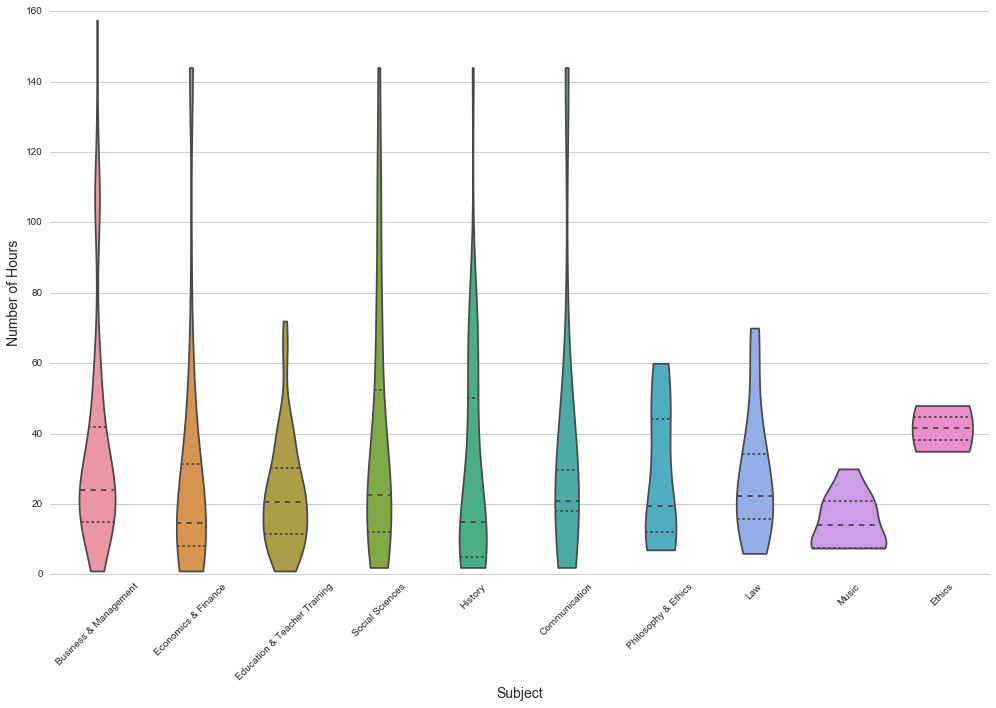

In [400]:
###   violin plot of the distribution of expected course hours by subject - for Social Sciences
###   this graph is ordered by number of courses offered in each subject (most on left, least on right)

a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

g1 = sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Social Sciences'],
               order = soc_sci_ordered,
               inner="quart", size = 20, cut = 0)

ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.tight_layout()
g1.figure.savefig("SS_courses_length_dist.png")


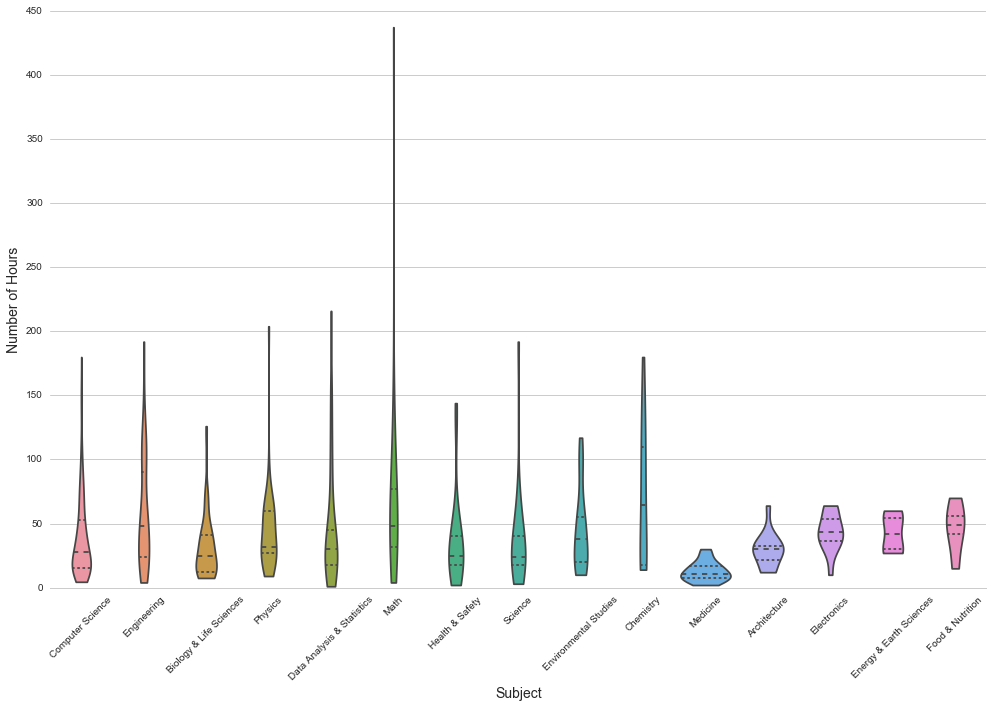

In [401]:
###   violin plot of the distribution of expected course hours by subject - for Math/Hard Sciences
###   this graph is ordered by number of courses offered in each subject (most on left, least on right)

a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

g1 = sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Math/Sciences'],
               order = math_ordered,
               inner="quart", size = 20, cut = 0)

ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.tight_layout()
g1.figure.savefig("MATH_courses_length_dist.png")

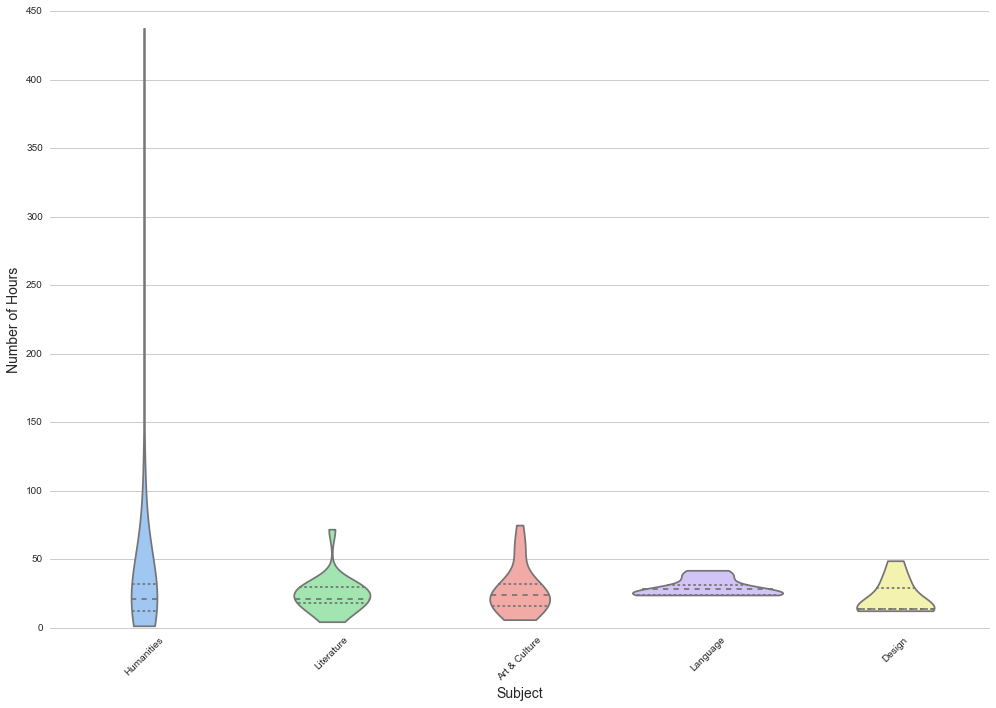

In [447]:
###   violin plot of the distribution of expected course hours by subject - for Humanities
###   this graph is ordered by number of courses offered in each subject (most on left, least on right)

a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

g1 = sns.violinplot(x="subject", 
               y="expected_hours", 
               data = courses_new_working[courses_new_working['division'] == 'Humanities'],
               order = hum_ordered,
               inner="quart", size = 20, cut = 0)

ax.set_ylabel('Number of Hours', fontsize = 14)
ax.set_xlabel('Subject', fontsize = 14)

sns.despine(left=True)
plt.xticks(rotation=45)

plt.tight_layout()
g1.figure.savefig("HUM_courses_length_dist.png")